In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datamunge/sign-language-mnist")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\LAP-STORE\.cache\kagglehub\datasets\datamunge\sign-language-mnist\versions\1


In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# تحميل بيانات التدريب
train_data = pd.read_csv("C:/Users/LAP-STORE/Desktop/Amit/projects/sign-language-mnist/versions/1/sign_mnist_train.csv")
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values

# تحميل بيانات الاختبار
test_data = pd.read_csv("C:/Users/LAP-STORE/Desktop/Amit/projects/sign-language-mnist/versions/1/sign_mnist_test.csv")
X_test = test_data.drop("label", axis=1).values
y_test = test_data["label"].values

# تحويل الصور إلى شكل 28x28x1 وتطبيعها
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# تحويل التصنيفات إلى One-Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(25, activation='softmax')
])

# إعداد النموذج للتدريب
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\LAP-STORE\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.4331 - loss: 1.9506 - val_accuracy: 0.9434 - val_loss: 0.1948
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9602 - loss: 0.1490 - val_accuracy: 0.9967 - val_loss: 0.0343
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9973 - loss: 0.0241 - val_accuracy: 0.9995 - val_loss: 0.0073
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9936 - loss: 0.0269 - val_accuracy: 0.9998 - val_loss: 0.0029
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9985 - loss: 0.0071 - val_accuracy: 0.9998 - val_loss: 0.0012
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 7.4390e-04 - val_accuracy: 1.0000 - val_loss: 6.3461e-04
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 1.0000 - loss: 4.1559e-04 - val_accuracy: 1.0000 - val_loss: 4.7379e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 1.0000 - loss: 2.

In [5]:
# تقييم على test.csv
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9262 - loss: 0.3910
Test Accuracy: 92.90%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


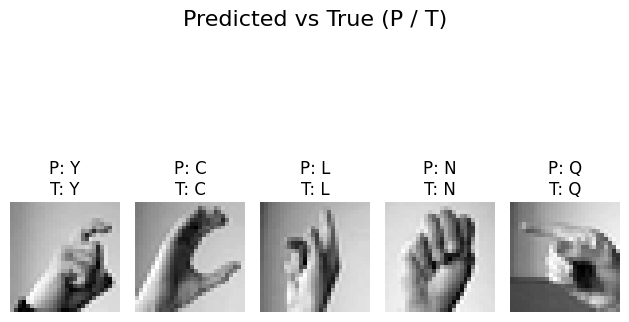

In [6]:
import matplotlib.pyplot as plt
import random

# عدد الصور اللي هنعرضها
num_samples = 5

# اختيار أرقام عشوائية من بيانات الاختبار
indices = random.sample(range(len(X_test)), num_samples)

# قائمة الحروف A-Z بدون J (لأن J مش موجود في الـ dataset)
labels = [chr(i) for i in range(65, 91) if chr(i) != 'J']

for i, idx in enumerate(indices):
    # صورة الإدخال
    image = X_test[idx]
    
    # توقع النموذج
    prediction = model.predict(image.reshape(1, 28, 28, 1))
    predicted_class = np.argmax(prediction)
    
    # القيمة الحقيقية
    true_class = np.argmax(y_test[idx])

    # عرض الصورة
    plt.subplot(1, num_samples, i+1)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"P: {labels[predicted_class]}\nT: {labels[true_class]}")

plt.suptitle("Predicted vs True (P / T)", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential  # استخدم model اللي انت دربته
import tensorflow as tf

# قائمة الحروف A-Z بدون J
classes = [chr(i) for i in range(65, 91) if chr(i) != ord('J')]

# فتح الكاميرا
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # قلب الصورة (mirror effect)
    frame = cv2.flip(frame, 1)

    # تحديد مكان المربع
    x1, y1, x2, y2 = 100, 100, 324, 324
    roi = frame[y1:y2, x1:x2]

    # معالجة الصورة:
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)                      # إلى رمادي
    roi_blur = cv2.GaussianBlur(roi_gray, (5, 5), 0)                      # إزالة الضوضاء
    _, roi_thresh = cv2.threshold(roi_blur, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)  # عتبة

    # تغيير الحجم إلى 28x28 وتطبيعه
    roi_resized = cv2.resize(roi_thresh, (28, 28)) / 255.0
    roi_input = roi_resized.reshape(1, 28, 28, 1)

    # توقع النموذج
    prediction = model.predict(roi_input)
    top_indices = prediction[0].argsort()[-3:][::-1]  # أعلى 3 احتمالات

    # رسم المربع
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # عرض التوقعات الثلاثة الأوائل
    for i, idx in enumerate(top_indices):
        letter = classes[idx]
        confidence = prediction[0][idx] * 100
        cv2.putText(frame, f'{letter}: {confidence:.1f}%', (x1, y2 + 30 + i*30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    # عرض الإطار
    cv2.imshow("Sign Language Detection", frame)

    # اضغط 'q' للخروج
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# إنهاء
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━